In [286]:
from pandas import read_csv
import random
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import math
from random import seed
from random import randrange

In [287]:
#import csv
filename = 'Iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class','v1', 'v2']
dataset = read_csv(filename, names=names)

In [288]:
# Data Lookup
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class  v1  v2
0            5.1          3.5           1.4          0.2  Iris-setosa   0   0
1            4.9          3.0           1.4          0.2  Iris-setosa   0   0
2            4.7          3.2           1.3          0.2  Iris-setosa   0   0
3            4.6          3.1           1.5          0.2  Iris-setosa   0   0
4            5.0          3.6           1.4          0.2  Iris-setosa   0   0
5            5.4          3.9           1.7          0.4  Iris-setosa   0   0
6            4.6          3.4           1.4          0.3  Iris-setosa   0   0
7            5.0          3.4           1.5          0.2  Iris-setosa   0   0
8            4.4          2.9           1.4          0.2  Iris-setosa   0   0
9            4.9          3.1           1.5          0.1  Iris-setosa   0   0
10           5.4          3.7           1.5          0.2  Iris-setosa   0   0
11           4.8          3.4           1.6          0.2  Iris-s

In [289]:
# program function for sigmoid and output binary
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def output(x):
    if (x<0.5):
        return 0
    else:
        return 1

In [290]:
arr = dataset.values
X = arr[:,0:4] 
Y1 = arr[:,5]
Y2 = arr[:,6]
print(X)
print(len(X))

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [348]:
# Split a dataset into k folds
def cross_validation_split(dataset, folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# test cross validation split
seed(1)
dataset = []
train = []
for x in range(150):
    dataset.append(x)
test = cross_validation_split(dataset, 5)
for i in range(5):
    train.append(i)
    print("Test ", i+1," : ",test[i])
    train[i] = [x for x in dataset if x not in test[i]]
    print("Train ", i+1," : ",train[i])
    print(len(test[i]),len(train[i]),"\n")

Test  1  :  [34, 146, 16, 67, 31, 130, 119, 125, 101, 56, 25, 134, 7, 107, 120, 0, 127, 76, 65, 30, 92, 9, 6, 4, 98, 83, 2, 147, 138, 60]
Train  1  :  [1, 3, 5, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 122, 123, 124, 126, 128, 129, 131, 132, 133, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 148, 149]
30 120 

Test  2  :  [108, 38, 70, 116, 8, 87, 41, 129, 75, 85, 95, 43, 61, 44, 122, 42, 141, 84, 54, 5, 80, 109, 126, 21, 37, 128, 148, 59, 26, 71]
Train  2  :  [0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55

In [366]:
for x in range(len(train[0])) :
    print(X[train[0][x]])

[4.9 3.0 1.4 0.2]
[4.6 3.1 1.5 0.2]
[5.4 3.9 1.7 0.4]
[4.4 2.9 1.4 0.2]
[5.4 3.7 1.5 0.2]
[4.8 3.4 1.6 0.2]
[4.8 3.0 1.4 0.1]
[4.3 3.0 1.1 0.1]
[5.8 4.0 1.2 0.2]
[5.7 4.4 1.5 0.4]
[5.1 3.5 1.4 0.3]
[5.7 3.8 1.7 0.3]
[5.1 3.8 1.5 0.3]
[5.4 3.4 1.7 0.2]
[5.1 3.7 1.5 0.4]
[4.6 3.6 1.0 0.2]
[5.1 3.3 1.7 0.5]
[4.8 3.4 1.9 0.2]
[5.0 3.4 1.6 0.4]
[5.2 3.5 1.5 0.2]
[5.2 3.4 1.4 0.2]
[4.7 3.2 1.6 0.2]
[5.2 4.1 1.5 0.1]
[5.5 4.2 1.4 0.2]
[5.0 3.2 1.2 0.2]
[5.5 3.5 1.3 0.2]
[4.9 3.1 1.5 0.1]
[4.4 3.0 1.3 0.2]
[5.1 3.4 1.5 0.2]
[5.0 3.5 1.3 0.3]
[4.5 2.3 1.3 0.3]
[4.4 3.2 1.3 0.2]
[5.0 3.5 1.6 0.6]
[5.1 3.8 1.9 0.4]
[4.8 3.0 1.4 0.3]
[5.1 3.8 1.6 0.2]
[4.6 3.2 1.4 0.2]
[5.3 3.7 1.5 0.2]
[5.0 3.3 1.4 0.2]
[7.0 3.2 4.7 1.4]
[6.4 3.2 4.5 1.5]
[6.9 3.1 4.9 1.5]
[5.5 2.3 4.0 1.3]
[6.5 2.8 4.6 1.5]
[5.7 2.8 4.5 1.3]
[4.9 2.4 3.3 1.0]
[6.6 2.9 4.6 1.3]
[5.2 2.7 3.9 1.4]
[5.9 3.0 4.2 1.5]
[6.0 2.2 4.0 1.0]
[6.1 2.9 4.7 1.4]
[5.6 2.9 3.6 1.3]
[5.6 3.0 4.5 1.5]
[6.2 2.2 4.5 1.5]
[5.6 2.5 3.9 1.1]
[5.9 3.2 4

|Fold :  1 |
 ----------
TRAIN DATA
Epoch :  1
Average Error :  0.3487796704665015
Algortihm Accuracy :  0.35

TEST DATA
Weight 1 : [-0.2650968020571199, -0.22058101713398506, 0.9816924462204245, 0.3630200118436091]
Bias 1 :  -0.0654700699331851
Weight 2 : [0.48534613060436416, 0.9801793385081249, 0.8307613278914661, 0.3954749205032333]
Bias 2 :  0.9898214810447433
Average Error :  0.49878655984346676
Algortihm Accuracy :  0.0
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  2
Average Error :  0.3355323032332873
Algortihm Accuracy :  0.35

TEST DATA
Weight 1 : [-0.35782207574903363, -0.33126542528546, 1.1348454761403115, 0.4474379584299904]
Bias 1 :  -0.09961593383107548
Weight 2 : [0.4675025594090633, 0.9683717144776105, 0.8253698098090072, 0.3945327685567642]
Bias 2 :  0.9861294304872537
Average Error :  0.48221586402046807
Algortihm Accuracy :  0.0
---------------------------------------------------------------

Algortihm Accuracy :  0.875

TEST DATA
Weight 1 : [-1.3052781933715933, -0.8606067962498547, 2.2906167318055504, 1.40916410801933]
Bias 1 :  -0.32255459613355114
Weight 2 : [-0.6077077331783194, 0.10664276011942506, -0.11722586924190444, -0.09474944868335507]
Bias 2 :  0.8313366225345932
Average Error :  0.19201091099858952
Algortihm Accuracy :  0.7333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  21
Average Error :  0.06196682136120784
Algortihm Accuracy :  0.875

TEST DATA
Weight 1 : [-1.3489045281392844, -0.8710874749108091, 2.3361127941660413, 1.454849726944552]
Bias 1 :  -0.33010795896755757
Weight 2 : [-0.5920919665931138, 0.10171987174842903, -0.1327829345988614, -0.10471125315430055]
Bias 2 :  0.8426955115796353
Average Error :  0.19052829243102878
Algortihm Accuracy :  0.7333333333333333
----------------------------------------------------------------------------------------------------

TR

Epoch :  52
Average Error :  0.05588146051857325
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-2.2054387609991126, -1.4091507885286252, 3.4139664050533463, 2.472171608016008]
Bias 1 :  -0.6140412404713115
Weight 2 : [-0.09335122639725414, -0.5684752412108981, -0.25748094898163165, -0.5046244887557501]
Bias 2 :  1.0734165502233028
Average Error :  0.15941868056658148
Algortihm Accuracy :  0.7333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  53
Average Error :  0.05576419219971327
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-2.2224918693005753, -1.4289295243676852, 3.440343417275911, 2.4962735528622435]
Bias 1 :  -0.6241056036554173
Weight 2 : [-0.08376855488678989, -0.5829359101120211, -0.2597941243493748, -0.5126949120520764]
Bias 2 :  1.0789287704337267
Average Error :  0.1588941228098381
Algortihm Accuracy :  0.7333333333333333
-------------------------------

Algortihm Accuracy :  0.7333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  79
Average Error :  0.052574749232828864
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-2.587385973714416, -1.9163335643040202, 4.03857985629785, 3.0556070181508708]
Bias 1 :  -0.8931813488849087
Weight 2 : [0.13490722960477383, -0.9212022605911856, -0.30828821149620184, -0.6818430460052055]
Bias 2 :  1.2246977670049286
Average Error :  0.1483595356159634
Algortihm Accuracy :  0.7333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  80
Average Error :  0.05242738689857547
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-2.5995168066742225, -1.933618583725612, 4.059046159037515, 3.0754334844794475]
Bias 1 :  -0.9037288537971134
Weight 2 : [0.14228157556222143, -0.9334098139744808, -0.3095493839888362, -0.687259

Algortihm Accuracy :  0.3
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  8
Average Error :  0.3845913304142947
Algortihm Accuracy :  0.2833333333333333

TEST DATA
Weight 1 : [0.6945896300701524, 0.7762178353691801, 0.6107626919659108, 0.387655808985726]
Bias 1 :  0.8852189403838957
Weight 2 : [-0.6527169653316275, 0.18864341972279064, -0.263198753601593, 0.5699947830632908]
Bias 2 :  0.2959888578307778
Average Error :  0.5215951417643947
Algortihm Accuracy :  0.3
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  9
Average Error :  0.38486671709922476
Algortihm Accuracy :  0.2916666666666667

TEST DATA
Weight 1 : [0.6732496517730072, 0.76250425763396, 0.603268988225966, 0.38620286043965646]
Bias 1 :  0.8809507532011825
Weight 2 : [-0.6137022495174542, 0.18210865143793156, -0.29870020489720905, 0.5327107423431675]
Bias 2 :  0.31178522198118
Av

Weight 2 : [0.07759574948321205, -0.631590908889969, -0.48349411363955985, -0.12914642355646808]
Bias 2 :  0.5457625077674476
Average Error :  0.28957908628959955
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  32
Average Error :  0.05432236608451188
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-1.3519276492354564, -0.7047366318674574, 2.061430190880919, 1.5711339868175695]
Bias 1 :  0.4234474425902699
Weight 2 : [0.10520657822597256, -0.6723801858400059, -0.4890659308543332, -0.1533829536202021]
Bias 2 :  0.5566060113629497
Average Error :  0.28758144917987927
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  33
Average Error :  0.05366102804729917
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-1.3990003657588257, -0.7134117

Average Error :  0.2441521649906573
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  64
Average Error :  0.04479226741781018
Algortihm Accuracy :  0.9083333333333333

TEST DATA
Weight 1 : [-2.4595209978558605, -1.0319809957652633, 3.2360304204372325, 2.787532357218727]
Bias 1 :  0.2138399045901286
Weight 2 : [0.712745944107177, -1.619398460735144, -0.5216703814859784, -0.9522706180630767]
Bias 2 :  0.9001121701259573
Average Error :  0.24321277201501804
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  65
Average Error :  0.04464825066991898
Algortihm Accuracy :  0.9083333333333333

TEST DATA
Weight 1 : [-2.4841588839259954, -1.0437969526866973, 3.26423420563793, 2.817910732368036]
Bias 1 :  0.20751814485400683
Weight 2 : [0.731766015268116, -1.6478387988320313, 

Average Error :  0.04363213472068501
Algortihm Accuracy :  0.9083333333333333

TEST DATA
Weight 1 : [-2.795072086491819, -1.2077542564912966, 3.625014760493003, 3.2221779652836995]
Bias 1 :  0.1152349645150738
Weight 2 : [1.0076474473348478, -2.0557942147477077, -0.5470454896146973, -1.356139873213452]
Bias 2 :  1.0088630283680688
Average Error :  0.23260046714136476
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  80
Average Error :  0.04360424964259576
Algortihm Accuracy :  0.9083333333333333

TEST DATA
Weight 1 : [-2.8152914599273826, -1.2191068114577874, 3.6486111351598898, 3.2499426610517426]
Bias 1 :  0.10833111245629024
Weight 2 : [1.0280134495253141, -2.085654890674686, -0.5495557458050498, -1.3839817562428]
Bias 2 :  1.0155962827322897
Average Error :  0.232055903526102
Algortihm Accuracy :  0.6333333333333333
-------------------------------------------------------

Average Error :  0.3498835289504689
Algortihm Accuracy :  0.3333333333333333

TEST DATA
Weight 1 : [-0.20473708807669266, -0.04727738664029074, 0.7130166449194622, 0.37620387066717587]
Bias 1 :  0.42194923906111254
Weight 2 : [0.7590105657452288, 0.21594804923684852, 0.8376982493936178, 0.7827797465142784]
Bias 2 :  0.7567756865315413
Average Error :  0.5126966069358851
Algortihm Accuracy :  0.0
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  3
Average Error :  0.3446715640635218
Algortihm Accuracy :  0.3333333333333333

TEST DATA
Weight 1 : [-0.3215765844035925, -0.19731384928177734, 0.9156119253997286, 0.4793211250765513]
Bias 1 :  0.38199927867482664
Weight 2 : [0.6651633432564164, 0.1528405371931735, 0.8096950733364471, 0.7782479087147978]
Bias 2 :  0.7375643084037777
Average Error :  0.4906105714802731
Algortihm Accuracy :  0.0
---------------------------------------------------------------------------------

Weight 2 : [-0.044807675256544235, -0.521837541240299, -0.5350038558492928, 0.22490683891172406]
Bias 2 :  0.7556998007095578
Average Error :  0.25843282766068587
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  27
Average Error :  0.05545113434213007
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-1.5545366304786847, -0.9476889382930196, 2.503714475552406, 1.630471187763648]
Bias 1 :  0.09594602607929449
Weight 2 : [-0.025103808338597135, -0.546660286354427, -0.5432837096034726, 0.21651556714322825]
Bias 2 :  0.7601360001467428
Average Error :  0.25713160249466976
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  28
Average Error :  0.05521538074834156
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-1.5915584526772713, -0.962171

TEST DATA
Weight 1 : [-2.267944092379931, -1.3276478965362561, 3.403529833410598, 2.3269841275566714]
Bias 1 :  -0.07472662405331366
Weight 2 : [0.4111540858108342, -1.1396177569205872, -0.7094911804151696, 0.011129967107001568]
Bias 2 :  0.8505458341395171
Average Error :  0.23377874613525237
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  51
Average Error :  0.05097031477149333
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-2.2937053176793407, -1.345003936509727, 3.438032717265162, 2.352936531868711]
Bias 1 :  -0.0812077046173966
Weight 2 : [0.4271751706404229, -1.1622554411153616, -0.7162237673666603, 0.004709864766127189]
Bias 2 :  0.8564050344868712
Average Error :  0.2330119555123702
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  52
Av


TRAIN DATA
Epoch :  73
Average Error :  0.05059228175553732
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-2.79355939485912, -1.7068055584287707, 4.121132154233359, 2.870508780412354]
Bias 1 :  -0.22004973393486296
Weight 2 : [0.7275567011863558, -1.598910608584655, -0.8567719079014653, -0.09209166087171634]
Bias 2 :  1.0111637580177357
Average Error :  0.2196592176353441
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  74
Average Error :  0.050609099177439346
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-2.8138944485033286, -1.7221030071603611, 4.149239408346903, 2.8921641209271307]
Bias 1 :  -0.22640175144350871
Weight 2 : [0.7397541785620104, -1.6170282516896404, -0.8627992163442343, -0.09553882067013605]
Bias 2 :  1.018503194045612
Average Error :  0.21917408760662943
Algortihm Accuracy :  0.6666666666666666
------------------------

Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  98
Average Error :  0.051851981488656995
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-3.2598934414696643, -2.061964760495906, 4.767666433635038, 3.3813591844723487]
Bias 1 :  -0.38409420980833425
Weight 2 : [1.0097872251676843, -2.0150973994932655, -1.0002003890988622, -0.1713967145837458]
Bias 2 :  1.183837936270263
Average Error :  0.2093833829408676
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  99
Average Error :  0.05195903769047919
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-3.2769891649719605, -2.075156366364352, 4.791440389338737, 3.4007069657286126]
Bias 1 :  -0.3909320090212316
Weight 2 : [1.0202526363662743, -2.0296549535777246, -1.0060609533008409, -0.17412655

Average Error :  0.05785139564677755
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-1.1748288241773261, -0.5779700006176427, 1.9981178442885297, 1.38288825150467]
Bias 1 :  -0.3066377376272304
Weight 2 : [-0.19701844966286466, -0.37534413978124714, -0.23361546492804647, -0.24402483916682077]
Bias 2 :  0.3710067121331978
Average Error :  0.24712396098927103
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  19
Average Error :  0.058674788301790584
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-1.2061896965857786, -0.6043555801664217, 2.040513102083938, 1.4168467110647065]
Bias 1 :  -0.31280571754520714
Weight 2 : [-0.17772337910409422, -0.3722372952868151, -0.24532836478382108, -0.25486529611263253]
Bias 2 :  0.3852873153203195
Average Error :  0.24446381909386863
Algortihm Accuracy :  0.6666666666666666
-------------------------------------

Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-1.946805836803112, -1.1308210268123662, 2.9887796769307236, 2.24224661024378]
Bias 1 :  -0.4383035292386703
Weight 2 : [0.15006478066258297, -0.8117439365198356, -0.35889544954523084, -0.5193757047231704]
Bias 2 :  0.6697176051246193
Average Error :  0.20464304827094387
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  46
Average Error :  0.05752302845849641
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-1.9717724431543158, -1.1473703768491332, 3.02021555100611, 2.271643042467057]
Bias 1 :  -0.4431077682549954
Weight 2 : [0.16156945236614448, -0.8301262279952569, -0.36186897429830206, -0.5287168721550897]
Bias 2 :  0.6794864064354118
Average Error :  0.20363271979008563
Algortihm Accuracy :  0.6666666666666666
------------------------------------------------------------------------------------

Epoch :  69
Average Error :  0.056864638045304616
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-2.4790954786595707, -1.49843209008838, 3.6632449590338565, 2.9080628016986543]
Bias 1 :  -0.567642408359941
Weight 2 : [0.40804626267106753, -1.223433821543585, -0.4311289648887402, -0.7237360916165215]
Bias 2 :  0.893344965029336
Average Error :  0.18656390675817278
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  70
Average Error :  0.05688499734925829
Algortihm Accuracy :  0.8833333333333333

TEST DATA
Weight 1 : [-2.49869246726874, -1.5125914952508976, 3.688190226758368, 2.9344232608272796]
Bias 1 :  -0.5736743976119785
Weight 2 : [0.41792575616293004, -1.2391790995191065, -0.43421750089222655, -0.7311664313004843]
Bias 2 :  0.9022695648250848
Average Error :  0.18602766659727943
Algortihm Accuracy :  0.6666666666666666
-------------------------------------

Average Error :  0.057873162845338694
Algortihm Accuracy :  0.875

TEST DATA
Weight 1 : [-2.8930084783157564, -1.8001317489453825, 4.185991857417921, 3.4987548078730004]
Bias 1 :  -0.7184007703805833
Weight 2 : [0.6176974827804216, -1.5598216318566112, -0.5030121157282749, -0.8714425897967571]
Bias 2 :  1.094058377704739
Average Error :  0.176907694754311
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  93
Average Error :  0.057932576839201305
Algortihm Accuracy :  0.875

TEST DATA
Weight 1 : [-2.909484556725781, -1.8121594880007157, 4.206528236351493, 3.523840127552781]
Bias 1 :  -0.7255006814661458
Weight 2 : [0.6259351315728361, -1.5732448343921153, -0.5060932471328831, -0.8767952999959313]
Bias 2 :  1.1025811210860919
Average Error :  0.17658911599570826
Algortihm Accuracy :  0.6666666666666666
----------------------------------------------------------------------------

Weight 1 : [-1.1610842265294505, -0.7038384294825408, 1.8941458805256983, 1.5125887354702525]
Bias 1 :  0.2241172840877359
Weight 2 : [-0.09258435067286697, -0.2537208076892414, -0.5573977010292209, 0.2992941948153395]
Bias 2 :  -0.01681934206176489
Average Error :  0.28718140785318275
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  17
Average Error :  0.05913565834645161
Algortihm Accuracy :  0.875

TEST DATA
Weight 1 : [-1.2077666631086652, -0.7169299722095335, 1.9431834835744328, 1.5614772871617941]
Bias 1 :  0.21689261379699895
Weight 2 : [-0.07435345196868623, -0.26651249373289065, -0.5661579423148738, 0.27632087796551186]
Bias 2 :  -0.003286903415641636
Average Error :  0.28476978353984356
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  18
Average Error 

Average Error :  0.05039085458279253
Algortihm Accuracy :  0.9

TEST DATA
Weight 1 : [-2.0665642316171566, -1.0249419153415151, 2.8760529948630613, 2.524367525381866]
Bias 1 :  0.06488015322183227
Weight 2 : [0.37104637213165015, -0.9228914547294185, -0.5467525957693808, -0.337950692516263]
Bias 2 :  0.19346561576852225
Average Error :  0.23731673635627448
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  41
Average Error :  0.0501220800357917
Algortihm Accuracy :  0.9

TEST DATA
Weight 1 : [-2.0952839100628813, -1.0389085083933087, 2.909085840491059, 2.5586701567021777]
Bias 1 :  0.05903808922493224
Weight 2 : [0.39014665173197927, -0.9534503209499283, -0.5455613749348867, -0.3640081641613641]
Bias 2 :  0.20234251865222422
Average Error :  0.23581376421999023
Algortihm Accuracy :  0.6333333333333333
---------------------------------------------------------------------------

Average Error :  0.2139489726713329
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  63
Average Error :  0.04750928253726205
Algortihm Accuracy :  0.9083333333333333

TEST DATA
Weight 1 : [-2.618824532115679, -1.3408931000950892, 3.534601780822664, 3.2139279052744647]
Bias 1 :  -0.0637603486842284
Weight 2 : [0.705478514754295, -1.5017400574681465, -0.5211237142969947, -0.8521878562765509]
Bias 2 :  0.4112331778349953
Average Error :  0.21322840203284654
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  64
Average Error :  0.04745096089986234
Algortihm Accuracy :  0.9083333333333333

TEST DATA
Weight 1 : [-2.6386884487137117, -1.354608934012998, 3.5593170087667274, 3.2406086786099397]
Bias 1 :  -0.06942562232548416
Weight 2 : [0.7174224119022211, -1.5234021556832

Weight 2 : [0.9589857701962738, -1.9429806225151307, -0.49609574279367963, -1.3363115696092192]
Bias 2 :  0.5915537797558014
Average Error :  0.20220450029261172
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  84
Average Error :  0.04687278473907743
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-2.985868955325592, -1.6331175091323868, 4.00519296685053, 3.746606622093976]
Bias 1 :  -0.18834846873211988
Weight 2 : [0.9730798267451951, -1.966244423257964, -0.4947290979837101, -1.3630464070276045]
Bias 2 :  0.5999275236896737
Average Error :  0.20173522450211864
Algortihm Accuracy :  0.6333333333333333
----------------------------------------------------------------------------------------------------

TRAIN DATA
Epoch :  85
Average Error :  0.046864601754321
Algortihm Accuracy :  0.8916666666666667

TEST DATA
Weight 1 : [-3.001064722844477, -1.64730323193875

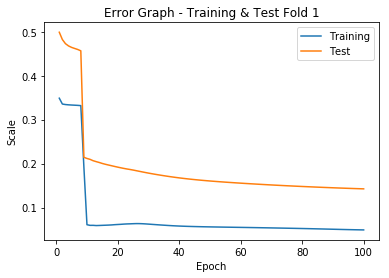

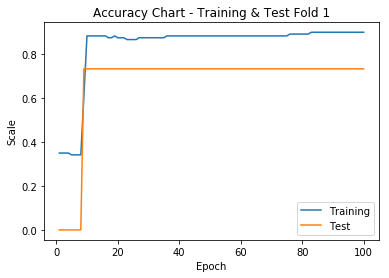

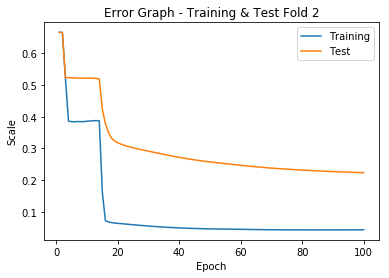

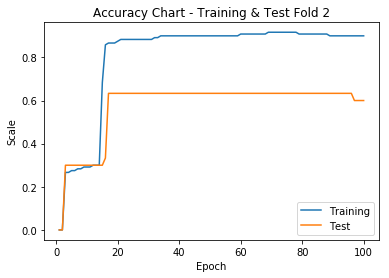

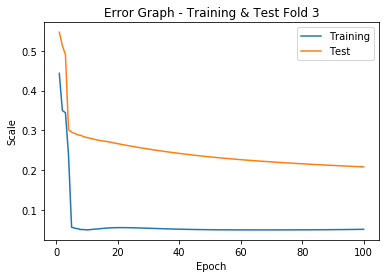

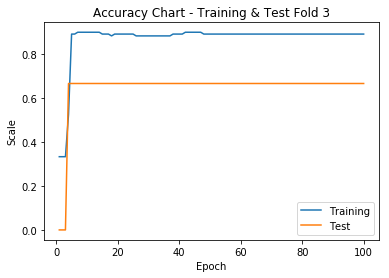

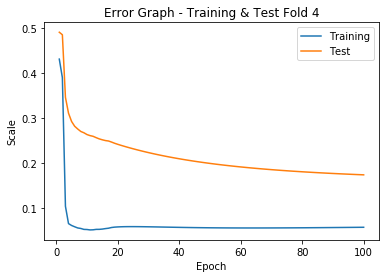

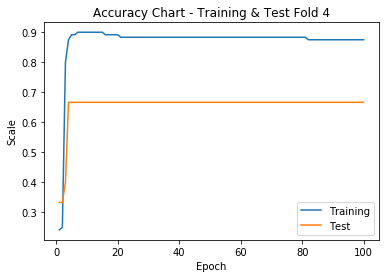

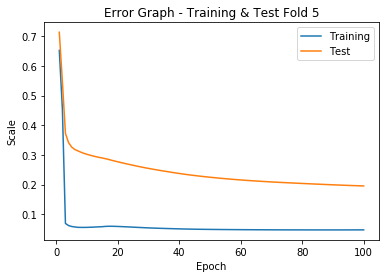

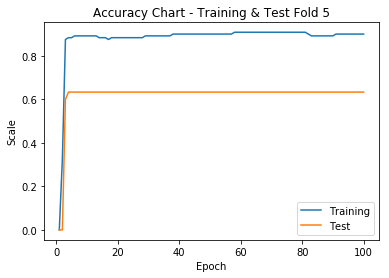

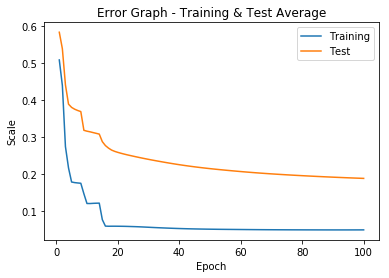

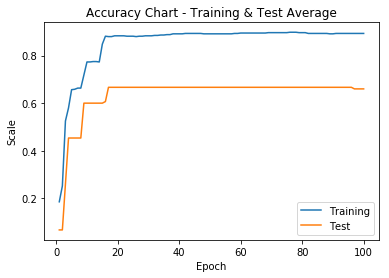

In [377]:
pla = []
ple = []
plat = []
plet = []

for i in range(5):
    #Train Data
    # linear equations classifier function

    w1 = random.uniform(0, 1) 
    w2 = random.uniform(0, 1) 
    w3 = random.uniform(0, 1) 
    w4 = random.uniform(0, 1)
    b1 = random.uniform(0, 1)

    dw1 = []
    dw2 = []
    dw3 = []
    dw4 = []
    db1 = []

    t1 = []
    sig1 = []
    err1 = []

    w5 = random.uniform(0, 1) 
    w6 = random.uniform(0, 1) 
    w7 = random.uniform(0, 1) 
    w8 = random.uniform(0, 1)
    b2 = random.uniform(0, 1)

    dw5 = []
    dw6 = []
    dw7 = []
    dw8 = []
    db2 = []

    t2 = []
    sig2 = []
    err2 = []


    tt1 = []
    sigt1 = []
    errt1 = []

    tt2 = []
    sigt2 = []
    errt2 = []

    l1= [w1, w2, w3, w4]
    l2= [w5, w6, w7, w8]

    a = []
    e = []
    epo = []


    at = []
    et = []
    epot = []
    
    print('|Fold : ', i+1,'|')
    print(' ----------')
    for epoch in range(1,101):
        print("TRAIN DATA")
        print('Epoch : ', epoch)
        # define learning rate (0.1/0.8)
        lr1 = 0.12
        # define accuracy variable 
        acc = 0
        acct = 0
        for x in range(0,len(train[i])) :
            #Append multiple array
            if(epoch==1):
                t1.append(0), sig1.append(0),err1.append(0), dw1.append(0), dw2.append(0), dw3.append(0), dw4.append(0), db1.append(0)
                t2.append(0), sig2.append(0), err2.append(0), dw5.append(0), dw6.append(0), dw7.append(0), dw8.append(0), db2.append(0)
                tt1.append(0),sigt1.append(0),errt1.append(0),tt2.append(0),sigt2.append(0),errt2.append(0)
            # Target
            # print("L1 : ", l1)*/
            t1[x] = sum(X[train[i][x]]*l1) + b1
            t2[x] = sum(X[train[i][x]]*l2) + b2
            # Sigmoid
            sig1[x] = sigmoid(t1[x])
            sig2[x] = sigmoid(t2[x])
            # Output
            #print("Output 1: ", output(sig1[x]))
            #print("Output 2: ", output(sig2[x]))
            #print("Y1 : ", Y1[train[i][x]])
            #print("Y2 : ", Y2[train[i][x]])
            if output(sig1[x]) == Y1[train[i][x]] and output(sig2[x]) == Y2[train[i][x]] :
                acc += 1
            #print("Accuracy : ", acc)
            # Error
            err1[x] = (sig1[x]-Y1[train[i][x]])**2
            #print("Error 1 : ", err1[x])
            err2[x] = (sig2[x]-Y2[train[i][x]])**2
            #print("Error 2 : ", err2[x])
            # Partial Derivative of Weight and Bias
            dw1[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][0]
            dw2[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][1]
            dw3[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][2]
            dw4[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*X[train[i][x]][3]
            db1[x] = 2*(sig1[x]-Y1[train[i][x]])*(1-sig1[x])*sig1[x]*1
            dw5[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][0]
            dw6[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][1]
            dw7[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][2]
            dw8[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*X[train[i][x]][3]
            db2[x] = 2*(sig2[x]-Y2[train[i][x]])*(1-sig2[x])*sig2[x]*1
            # Update the new value of weight and bias for next itteration
            w1 = w1-(lr1*dw1[x])
            w2 = w2-(lr1*dw2[x])
            w3 = w3-(lr1*dw3[x])
            w4 = w4-(lr1*dw4[x])
            b1 = b1-(lr1*db1[x])
            w5 = w5-lr1*dw5[x]
            w6 = w6-lr1*dw6[x]
            w7 = w7-lr1*dw7[x]
            w8 = w8-lr1*dw8[x]
            b2 = b2-lr1*db2[x]
            l1= [w1, w2, w3, w4]
            l2= [w5, w6, w7, w8]
            #print("------------------------------------------------------")
        # Error Average and Accuracy
        avg_err1 = (sum(err1[0:len(train[i])])/len(train[i]))
        avg_err2 = (sum(err2[0:len(train[i])])/len(train[i]))
        avg_err = (avg_err1+avg_err2)/2
        accuracy = (acc/len(train[i]))
        epo.append(epoch)
        a.append(accuracy)
        e.append(avg_err)
        #print("Error LC 1 : ", avg_err1)
        #print("Error LC 2 : ", avg_err2)
        print("Average Error : ", avg_err)
        print("Algortihm Accuracy : ", accuracy)
        #print("----------------------------------------------------------------------------------------------------")

        #Test Data  
        print("\nTEST DATA")
        print("Weight 1 :", l1)
        print("Bias 1 : ", b1)
        print("Weight 2 :", l2)
        print("Bias 2 : ", b2)

        for x in range(len(test[i])) :
            tt1[x] = sum(X[test[i][x]]*l1) + b1
            tt2[x] = sum(X[test[i][x]]*l2) + b2
            sigt1[x] = sigmoid(tt1[x])
            #print("Sigmoid 1 : ", sigt1[x])
            sigt2[x] = sigmoid(tt2[x])
            #print("Sigmoid 2 : ", sigt2[x])
            #print("Output 1: ", output(sigt1[x]))
            #print("Output 2: ", output(sigt2[x]))
            #print("Y1 : ", Y1[test[i][x]])
            #print("Y2 : ", Y2[test[i][x]])
            if output(sigt1[x]) == Y1[test[i][x]] and output(sigt2[x]) == Y2[test[i][x]] :
                acct += 1
            #print("Accuracy Test: ", acct)
            errt1[x] = (sigt1[x]-Y1[test[i][x]])**2
            errt2[x] = (sigt2[x]-Y2[test[i][x]])**2
            #print("------------------------------------------------------")
        avg_errt1 = (sum(errt1[0:len(test[i])])/len(test[i]))
        avg_errt2 = (sum(errt2[0:len(test[i])])/len(test[i]))
        avg_errt = (avg_errt1+avg_errt2)/2
        accuracyt = (acct/len(test[i]))
        at.append(accuracyt)
        et.append(avg_errt)
        #print("Error LC 1 : ", avg_errt1)
        #print("Error LC 2 : ", avg_errt2)
        print("Average Error : ", avg_errt)
        print("Algortihm Accuracy : ", accuracyt)
        print("----------------------------------------------------------------------------------------------------\n")
    
    pla.append(a)
    ple.append(e)
    plat.append(at)
    plet.append(et)
    
# Plotting Error and Accuracy Chart
plt.figure(1)
plt.plot(epo, ple[0],label='Training')
plt.plot(epo, plet[0],label='Test')
plt.title('Error Graph - Training & Test Fold 1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(2)
plt.plot(epo, pla[0],label='Training')
plt.plot(epo, plat[0],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(3)
plt.plot(epo, ple[1],label='Training')
plt.plot(epo, plet[1],label='Test')
plt.title('Error Graph - Training & Test Fold 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(4)
plt.plot(epo, pla[1],label='Training')
plt.plot(epo, plat[1],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(5)
plt.plot(epo, ple[2],label='Training')
plt.plot(epo, plet[2],label='Test')
plt.title('Error Graph - Training & Test Fold 3')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(6)
plt.plot(epo, pla[2],label='Training')
plt.plot(epo, plat[2],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 3')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(7)
plt.plot(epo, ple[3],label='Training')
plt.plot(epo, plet[3],label='Test')
plt.title('Error Graph - Training & Test Fold 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(8)
plt.plot(epo, pla[3],label='Training')
plt.plot(epo, plat[3],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 4')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(9)
plt.plot(epo, ple[4],label='Training')
plt.plot(epo, plet[4],label='Test')
plt.title('Error Graph - Training & Test Fold 5')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(10)
plt.plot(epo, pla[4],label='Training')
plt.plot(epo, plat[4],label='Test')
plt.title('Accuracy Chart - Training & Test Fold 5')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(11)
plt.plot(epo, (np.array(ple[0])+np.array(ple[1])+np.array(ple[2])+np.array(ple[3])+np.array(ple[4]))/5,label='Training')
plt.plot(epo, (np.array(plet[0])+np.array(plet[1])+np.array(plet[2])+np.array(plet[3])+np.array(plet[4]))/5,label='Test')
plt.title('Error Graph - Training & Test Average')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.figure(12)
plt.plot(epo, (np.array(pla[0])+np.array(pla[1])+np.array(pla[2])+np.array(pla[3])+np.array(pla[4]))/5,label='Training')
plt.plot(epo, (np.array(plat[0])+np.array(plat[1])+np.array(plat[2])+np.array(plat[3])+np.array(plat[4]))/5,label='Test')
plt.title('Accuracy Chart - Training & Test Average')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Scale')

plt.show()
